In [25]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the dataset
df = pd.read_csv(r"C:\Users\LADY FEJ\forecastdemand.csv")

In [27]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())
print("\nBasic statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                730 non-null    object 
 1   product_id          730 non-null    object 
 2   category            730 non-null    object 
 3   sales               730 non-null    int64  
 4   price               730 non-null    float64
 5   inventory_level     730 non-null    int64  
 6   marketing_spend     730 non-null    float64
 7   competitor_price    730 non-null    float64
 8   website_traffic     730 non-null    int64  
 9   seasonal_factor     730 non-null    float64
 10  market_sentiment    730 non-null    float64
 11  economic_indicator  730 non-null    float64
 12  is_holiday          730 non-null    int64  
dtypes: float64(6), int64(4), object(3)
memory usage: 74.3+ KB
None

First few rows:
         date product_id     category  sales       price  inv

In [30]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
date                  0
product_id            0
category              0
sales                 0
price                 0
inventory_level       0
marketing_spend       0
competitor_price      0
website_traffic       0
seasonal_factor       0
market_sentiment      0
economic_indicator    0
is_holiday            0
dtype: int64


In [32]:
# Data Cleaning Steps
# 1. Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# 2. Handle outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

numerical_columns = ['sales', 'price', 'inventory_level', 'marketing_spend', 
                    'competitor_price', 'website_traffic', 'market_sentiment', 
                    'economic_indicator']

for col in numerical_columns:
    df = remove_outliers(df, col)

# 3. Feature Engineering
# Add month and day of week
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

# Create price difference with competitors
df['price_difference'] = df['price'] - df['competitor_price']
df['price_ratio'] = df['price'] / df['competitor_price']


In [36]:
# Calculate inventory turnover ratio
df['inventory_turnover'] = df['sales'] / df['inventory_level']

In [38]:
# Visualizations
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

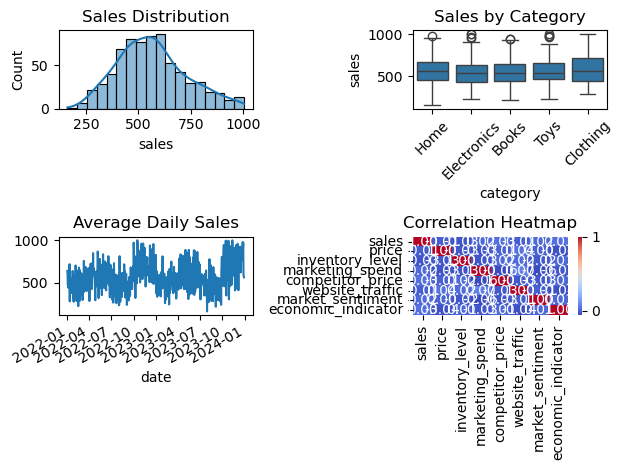

In [42]:
# 1. Sales Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['sales'], kde=True)
plt.title('Sales Distribution')
# 2. Sales by Category
plt.subplot(2, 2, 2)
sns.boxplot(x='category', y='sales', data=df)
plt.xticks(rotation=45)
plt.title('Sales by Category')

# 3. Sales Time Series
plt.subplot(2, 2, 3)
df.groupby('date')['sales'].mean().plot()
plt.title('Average Daily Sales')

# 4. Correlation Heatmap
plt.subplot(2, 2, 4)
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()


In [44]:
# 1. Category Analysis
print("\nCategory-wise Sales Statistics:")
print(df.groupby('category')['sales'].describe())

# 2. Seasonal Analysis
print("\nMonthly Sales Patterns:")
print(df.groupby('month')['sales'].mean().sort_values(ascending=False))

# 3. Day of Week Analysis
print("\nDay of Week Sales Patterns:")
print(df.groupby('day_of_week')['sales'].mean().sort_values(ascending=False))

# 4. Market Conditions Impact
print("\nCorrelation between Sales and Market Conditions:")
print(df[['sales', 'market_sentiment', 'economic_indicator']].corr()['sales'])


Category-wise Sales Statistics:
             count        mean         std    min     25%    50%     75%  \
category                                                                   
Books        150.0  557.326667  163.122159  218.0  448.50  540.0  644.00   
Clothing     144.0  585.402778  171.120426  294.0  451.00  563.5  720.00   
Electronics  150.0  545.693333  158.101995  240.0  436.75  539.0  635.25   
Home         121.0  573.561983  162.078988  162.0  464.00  567.0  667.00   
Toys         144.0  569.652778  161.114880  239.0  467.50  547.0  661.75   

                max  
category             
Books         947.0  
Clothing      998.0  
Electronics  1003.0  
Home          973.0  
Toys          997.0  

Monthly Sales Patterns:
month
12    737.296296
11    711.862069
10    704.684211
5     602.016393
4     598.706897
6     580.610169
3     519.163934
1     498.516129
2     475.800000
8     475.080645
7     461.403226
9     456.683333
Name: sales, dtype: float64

Day of Week Sale

In [48]:
#Save cleaned dataset
df.to_csv(r"C:\Users\LADY FEJ\cleanforcastdata.csv", index=False)

In [52]:
#Final Dataset Summary
print("\nFinal Dataset Shape:", df.shape)
print("\nFinal Dataset Columns:", df.columns.tolist())


Final Dataset Shape: (709, 18)

Final Dataset Columns: ['date', 'product_id', 'category', 'sales', 'price', 'inventory_level', 'marketing_spend', 'competitor_price', 'website_traffic', 'seasonal_factor', 'market_sentiment', 'economic_indicator', 'is_holiday', 'month', 'day_of_week', 'price_difference', 'price_ratio', 'inventory_turnover']
